With Homotopy continuation, try some higher dimension global optimization problems. 

In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
const d1, d2, ds = 2, 10, 1  # Degree range and step
const n, a, b = 3, 10, 1
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = alpine1 # Function to optimize

#21 (generic function with 1 method)

In [2]:
results = main_gen(f, n, d1, d2, ds, delta, alph, C)


dimension Vector space: 10

sample size: 1000

dimension Vector space: 20

sample size: 2744

dimension Vector space: 35

sample size: 6859

dimension Vector space: 56

sample size: 13824

dimension Vector space: 84

sample size: 27000

dimension Vector space: 120

sample size: 50653

dimension Vector space: 165

sample size: 79507

dimension Vector space: 220

sample size: 132651

dimension Vector space: 286

sample size: 205379


9-element Vector{Any}:
 [11.850220201254844, 0.054691494398933026, 1.026076602890081, 0.054691494398932824, 3.781607879571932e-16, 1.0260766028900803, 0.054691494398921875, 9.254870682691904e-16, 1.2389913300129056e-15, 1.0260766028900878]
 [10.1386259158482, -0.07867016173377912, 1.4856990067450395, -0.23770547427250843, -0.0786701617337767, 1.2440747310414037e-16, -3.594318351577339e-16, 1.4856990067450393, -1.5527527647209592e-16, -0.23770547427250815, -0.0786701617337809, 3.465573119865294e-16, -5.3919137214781415e-17, 7.29100088590687e-16, 1.7307407428082337e-16, -4.2726479374918505e-16, 1.485699006745037, 3.3798423749709694e-16, -1.1364000461804663e-15, -0.23770547427251312]
 [9.938308951848265, -0.1124759789367557, 1.6398731475265478, -0.15607212864294528, -1.375040462299166, -0.11247597893675598, -9.190073792011914e-17, 7.391817669226413e-17, 1.0291252547953851e-17, 1.6398731475265553  …  1.6398731475265418, -2.7318606199200915e-16, -1.0446244382096608e-15, 1.1380943873833414e-

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, JSON, PlotlyJS, CSV
include("hom_solve.jl")

RRsolve (generic function with 1 method)

In [4]:
# Define your main function
@polyvar(x[1:n]) # Define polynomial ring 
function main()
    # @polyvar x[1:n] # Define polynomial ring

    h_x = Float64[]
    h_y = Float64[]
    h_z = Float64[]

    col = Int[]  # Initialize the color vector

    for (i, d) in enumerate(d1:ds:d2)
        local lambda = support_gen(n, d)[1] # Take support  
        local R = generateApproximant(lambda, results[i], :BigFloat) # Compute the approximant

        # Generate the system for HomotopyContinuation
        local P1 = differentiate(R, x[1])
        local P2 = differentiate(R, x[2])
        local P3 = differentiate(R, x[3])

        local S = RRsolve(n, [P1, P2, P3]) # HomotopyContinuation

        # Define the condition for filtering
        condition(point) = -1 < point[1] < 1 && -1 < point[2] < 1 && -1 < point[3] < 1

        # Filter points using the filter function
        filtered_points = filter(condition, S)
        println("Number of solutions: ", length(filtered_points))

        append!(h_x, [point[1] for point in filtered_points]) # For plotting
        append!(h_y, [point[2] for point in filtered_points])
        append!(h_z, [point[3] for point in filtered_points])
        append!(col, fill(i, length(filtered_points)))
    end
    return h_x, h_y, h_z, col
end

main (generic function with 1 method)

In [5]:
h_x, h_y, h_z, col = main()

Number of solutions: 1
Tracking 8 paths...  25%|███████▊                       |  ETA: 0:00:10



Tracking 8 paths... 100%|███████████████████████████████| Time: 0:00:03
  # paths tracked:                  8
  # non-singular solutions (real):  8 (8)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         8 (8)
Number of solutions: 1
Tracking 27 paths...   7%|██▎                           |  ETA: 0:00:44



Tracking 27 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  27
  # non-singular solutions (real):  27 (27)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         27 (27)
Number of solutions: 27
Tracking 64 paths...   3%|█                             |  ETA: 0:02:05



Tracking 64 paths... 100%|██████████████████████████████| Time: 0:00:04
  # paths tracked:                  64
  # non-singular solutions (real):  64 (8)
  # singular endpoints (real):      0 (0)
  # total solutions (real):     

([-0.013325392627823096, -0.10178602578996396, -0.821082809481031, -0.012448645442038017, -0.821082809481031, 0.7909675814620342, -0.821082809481031, -0.012448645442038019, -0.821082809481031, 0.790967581462034  …  0.7959480364524529, -0.5283708197973043, 0.508177571745522, -0.015538919847373977, -0.7865456599103053, 0.31393843736236443, -0.7865456599103056, -0.5283708197973044, 0.7959480364524537, 0.3139384373623644], [-0.013325392627823056, -0.10178602578996444, -0.821082809481032, -0.012448645442038097, -0.012448645442037835, 0.7909675814620354, -0.8210828094810316, 0.7909675814620348, 0.7909675814620348, 0.7909675814620348  …  -0.015538919847373977, 0.31393843736236493, -0.37119984434082187, -0.9429791543139294, 0.7959480364524546, 0.7959480364524536, -0.5283708197973042, -0.015538919847373754, -0.37119984434082215, -0.01553891984737404], [-0.013325392627820287, -0.10178602578996596, -0.012448645442037984, -0.8210828094810313, -0.01244864544203831, -0.012448645442038478, -0.8210828

In [16]:
using DataFrames
df = DataFrame(x=C * h_x, y=C * h_y, z=C * h_z, col=col)
df[!, :result] = [f([df.x[i], df.y[i], df.z[i]]) for i in 1:nrow(df)]
println(df)

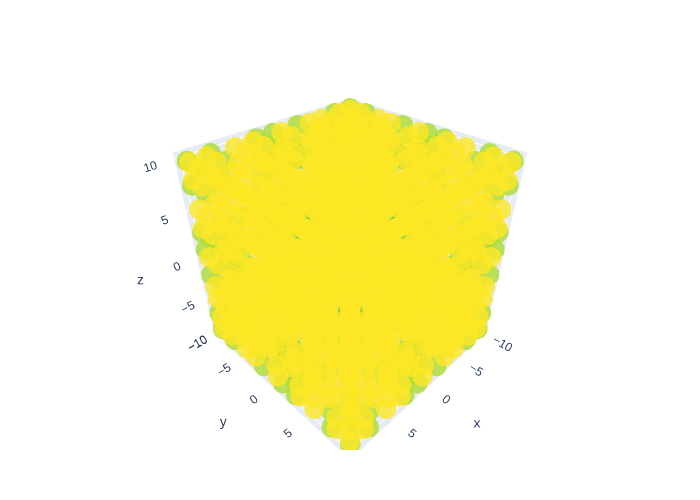

In [14]:
using PlotlyJS, CSV
plot(
    df,
    x=:x, y=:y, z=:z, 
    marker=attr(
        size=12,
        color=df.col,                # set color to an array/list of desired values
        colorscale="Viridis",   # choose a colorscale
        opacity=0.8
    ),
    type="scatter3d", mode="markers"
)

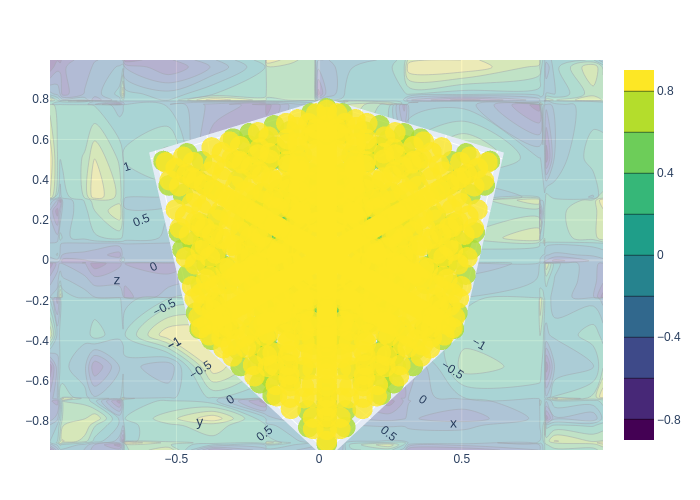

In [8]:

# Define the 3D scatter plot
scatter_trace = scatter3d(
    x=df.x,
    y=df.y,
    z=df.z,
    marker=attr(
        size=12,
        color=df.col,             # Set color to the 'col' column
        colorscale="Viridis",     # Choose a colorscale
        opacity=0.8
    ),
    mode="markers"
)

# Define the contour plot
contour_trace = contour(
    x=df.x,
    y=df.y,
    z=df.z,
    colorscale="Viridis",
    opacity=0.3
)

# Combine the traces in a plot
plot([scatter_trace, contour_trace])
